# ADA boosting

In [1]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

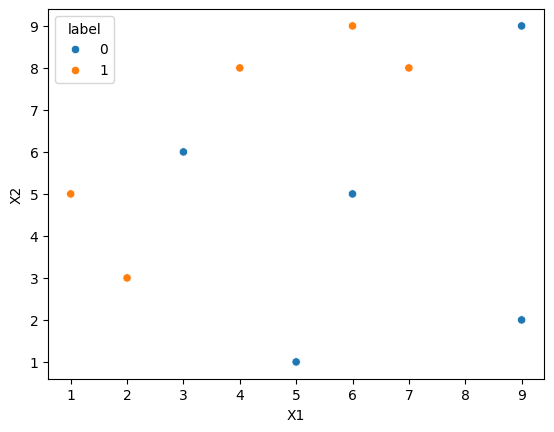

In [5]:
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'] )

In [6]:
df.shape

(10, 3)

In [7]:
df.shape[0] # number of rows

10

In [8]:
df.shape[1] # number of columns

3

In [9]:
1/df.shape[0]

0.1

In [10]:
df['sample_weight'] = 1/df.shape[0]

In [11]:
df

,X1,X2,label,sample_weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [12]:
dt1 =  DecisionTreeClassifier(max_depth=1)

In [13]:
x = df.iloc[:,0:2]

In [14]:
x

,X1,X2
0,1,5
1,2,3
2,3,6
3,4,8
4,5,1
5,6,9
6,6,5
7,7,8
8,9,9
9,9,2


In [15]:
y = df.iloc[:,2]

In [16]:
y

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: label, dtype: int64

In [17]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

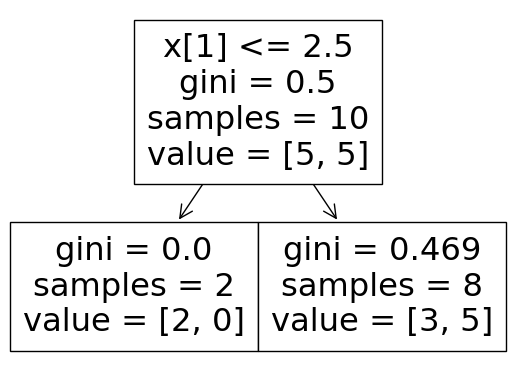

In [18]:
 plot_tree(dt1)

In [19]:
np.array(x)

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]], dtype=int64)

c:\Users\gadha\anaconda3\envs\ids\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

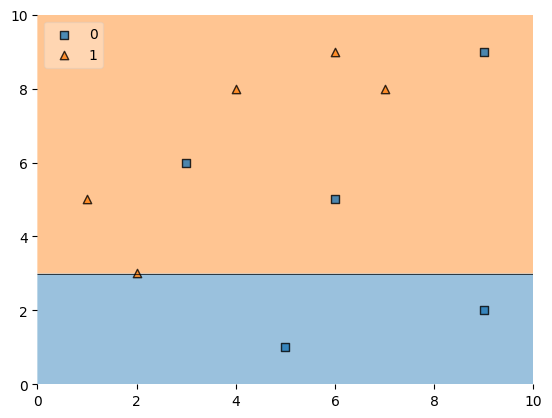

In [20]:
plot_decision_regions(np.array(x),np.array(y),clf=dt1,legend=2)

Here we can see that the in upper resion yellow there are 3 blue point are ther which are miss classified

In [21]:
df['y_pred']=dt1.predict(x)

In [22]:
df   

,X1,X2,label,sample_weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


now we have create a cloumn of prediction and we can compare the lable column and y_pred and i dentify miss classification as we can see that the graph has 3 miss classifictaion point and also in table we can see that

# Now we have to calculate the performance of the stump

Total Error = 1/number of rows = 1/10<br>

formula for performance of stump<br>
<b>POS = 1/2 loge ((1-TE)/TE)<b><br>

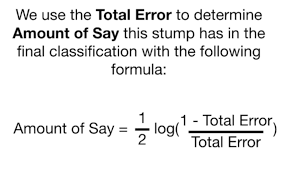




In [23]:
def calculate_model_weight(error):

    return 0.5*np.log((1-error)/(error))

<b>alpha1 = POS</b><br>

here we are taking 0.3 becouse we have 3 miss classifiactions and each have sample weight of 0.1 so for 3 we add them 0.1 + 0.1 + 0.1 = 0.3

In [24]:
alpha1 = calculate_model_weight(0.3)
alpha1  

0.42364893019360184

### Calculate the updated weight


In [1]:
def update_row_weights(row,alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['sample_weight'] * np.exp(-alpha)
    else:
        return row['sample_weight'] * np.exp(alpha)

In [26]:
df['updated_weights'] = df.apply(update_row_weights,axis=1) 

In [27]:
df

,X1,X2,label,sample_weight,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [28]:
df['sample_weight'].sum()

1.0

In [29]:
df['updated_weights'].sum()

0.9165153319682015

In [30]:
df['normalized_weights']=df['updated_weights']/df['updated_weights'].sum()

In [31]:
df

,X1,X2,label,sample_weight,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [32]:
df['normalized_weights'].sum()

1.0

Now we have to create a column for the bucket(bin) which consist of the range of the cumulative sum start fromm the 0-0.071475 then 2nd = 0.071475 + 0.071475 and so on

In [33]:
np.cumsum(df['normalized_weights'])

0    0.071475
1    0.142950
2    0.309508
3    0.380983
4    0.452458
5    0.523933
6    0.690492
7    0.761967
8    0.928525
9    1.000000
Name: normalized_weights, dtype: float64

In [34]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

df[['X1','X2','label','y_pred','sample_weight','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,y_pred,sample_weight,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,1,0.1,0.065508,0.000000,0.071475
1,2,3,1,1,0.1,0.065508,0.071475,0.142950
2,3,6,0,1,0.1,0.152653,0.142950,0.309508
3,4,8,1,1,0.1,0.065508,0.309508,0.380983
4,5,1,0,0,0.1,0.065508,0.380983,0.452458
5,6,9,1,1,0.1,0.065508,0.452458,0.523933
6,6,5,0,1,0.1,0.152653,0.523933,0.690492
7,7,8,1,1,0.1,0.065508,0.690492,0.761967
8,9,9,0,1,0.1,0.152653,0.761967,0.928525
9,9,2,0,0,0.1,0.065508,0.928525,1.000000


# DT2

Now for creating the data fro the dt2 we ahve to fist select 10 numbers between the 0-10 Random sampling

In [113]:
indexes = []


for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
        if row['cumsum_upper']>a and a>row['cumsum_lower']:
           indexes.append(index) 

In [114]:
indexes

[1, 0, 2, 7, 6, 5, 1, 0, 2, 0]

Now by using this indexes we will create a new data frame for the dt2

In [115]:
second_df = df.iloc[indexes] [['X1','X2','label','sample_weight']]

In [116]:
second_df

,X1,X2,label,sample_weight
1,2,3,1,0.1
0,1,5,1,0.1
2,3,6,0,0.1
7,7,8,1,0.1
6,6,5,0,0.1
5,6,9,1,0.1
1,2,3,1,0.1
0,1,5,1,0.1
2,3,6,0,0.1
0,1,5,1,0.1


In [117]:
dt2 = DecisionTreeClassifier(max_depth=1) 

In [118]:
x = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [119]:
x

array([[2, 3],
       [1, 5],
       [3, 6],
       [7, 8],
       [6, 5],
       [6, 9],
       [2, 3],
       [1, 5],
       [3, 6],
       [1, 5]], dtype=int64)

In [120]:
y

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [121]:
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.25, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]')]

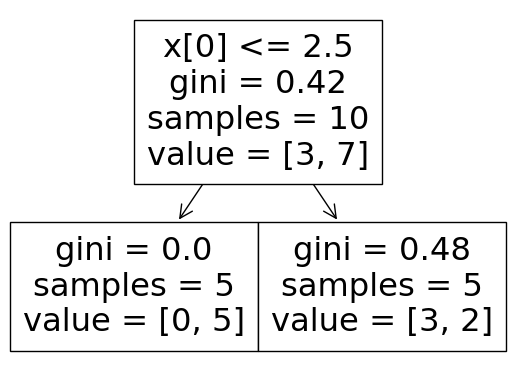

In [122]:
plot_tree(dt2)

<Axes: >

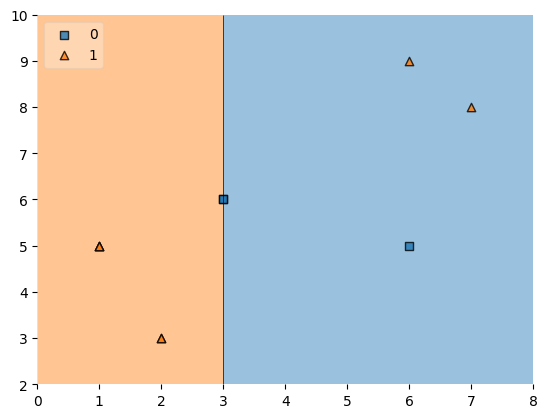

In [123]:
plot_decision_regions(np.array(x),np.array(y),clf=dt2,legend=2)

In [124]:
second_df['y_pred2'] = dt2.predict(x)

In [125]:
second_df

,X1,X2,label,sample_weight,y_pred2
1,2,3,1,0.1,1
0,1,5,1,0.1,1
2,3,6,0,0.1,0
7,7,8,1,0.1,0
6,6,5,0,0.1,0
5,6,9,1,0.1,0
1,2,3,1,0.1,1
0,1,5,1,0.1,1
2,3,6,0,0.1,0
0,1,5,1,0.1,1


In [126]:
alpha2 = calculate_model_weight(0.1)
alpha2  

1.0986122886681098

In [127]:
def update_row_weights(row,alpha=1.0986):
    if row['label'] == row['y_pred2']:
        return row['sample_weight'] * np.exp(-alpha)
    else:
        return row['sample_weight'] * np.exp(alpha)

In [128]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1) 

In [129]:
second_df

,X1,X2,label,sample_weight,y_pred2,updated_weights
1,2,3,1,0.1,1,0.033334
0,1,5,1,0.1,1,0.033334
2,3,6,0,0.1,0,0.033334
7,7,8,1,0.1,0,0.299996
6,6,5,0,0.1,0,0.033334
5,6,9,1,0.1,0,0.299996
1,2,3,1,0.1,1,0.033334
0,1,5,1,0.1,1,0.033334
2,3,6,0,0.1,0,0.033334
0,1,5,1,0.1,1,0.033334


In [130]:
second_df['normalized_weights']=second_df['updated_weights']/second_df['updated_weights'].sum()

In [131]:
second_df

,X1,X2,label,sample_weight,y_pred2,updated_weights,normalized_weights
1,2,3,1,0.1,1,0.033334,0.038462
0,1,5,1,0.1,1,0.033334,0.038462
2,3,6,0,0.1,0,0.033334,0.038462
7,7,8,1,0.1,0,0.299996,0.346151
6,6,5,0,0.1,0,0.033334,0.038462
5,6,9,1,0.1,0,0.299996,0.346151
1,2,3,1,0.1,1,0.033334,0.038462
0,1,5,1,0.1,1,0.033334,0.038462
2,3,6,0,0.1,0,0.033334,0.038462
0,1,5,1,0.1,1,0.033334,0.038462


In [132]:
second_df['normalized_weights'].sum()

0.9999999999999998

In [133]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

second_df[['X1','X2','label','y_pred2','sample_weight','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,y_pred2,sample_weight,updated_weights,cumsum_lower,cumsum_upper
1,2,3,1,1,0.1,0.033334,0.000000,0.038462
0,1,5,1,1,0.1,0.033334,0.038462,0.076924
2,3,6,0,0,0.1,0.033334,0.076924,0.115387
7,7,8,1,0,0.1,0.299996,0.115387,0.461538
6,6,5,0,0,0.1,0.033334,0.461538,0.500000
5,6,9,1,0,0.1,0.299996,0.500000,0.846151
1,2,3,1,1,0.1,0.033334,0.846151,0.884613
0,1,5,1,1,0.1,0.033334,0.884613,0.923076
2,3,6,0,0,0.1,0.033334,0.923076,0.961538
0,1,5,1,1,0.1,0.033334,0.961538,1.000000


## DT3

In [145]:
indexes2 = []


for i in range(second_df.shape[0]):
    a = np.random.random()
    for index,row in second_df.iterrows():
        if row['cumsum_upper']>a and a>row['cumsum_lower']:
           indexes2.append(index) 

In [146]:
indexes2

[7, 5, 5, 1, 5, 5, 0, 5, 5, 7]

In [147]:
third_df = df.iloc[indexes] [['X1','X2','label','sample_weight']]

In [148]:
third_df

,X1,X2,label,sample_weight
1,2,3,1,0.1
0,1,5,1,0.1
2,3,6,0,0.1
7,7,8,1,0.1
6,6,5,0,0.1
5,6,9,1,0.1
1,2,3,1,0.1
0,1,5,1,0.1
2,3,6,0,0.1
0,1,5,1,0.1


In [149]:
dt3 = DecisionTreeClassifier(max_depth=1) 

In [150]:
x = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values

In [151]:
x

array([[2, 3],
       [1, 5],
       [3, 6],
       [7, 8],
       [6, 5],
       [6, 9],
       [2, 3],
       [1, 5],
       [3, 6],
       [1, 5]], dtype=int64)

In [152]:
y

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [153]:
dt3.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.25, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]')]

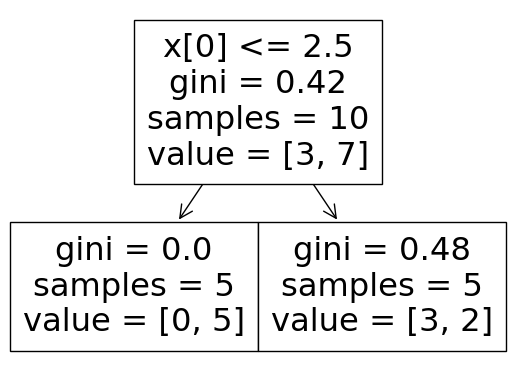

In [154]:
plot_tree(dt3)

<Axes: >

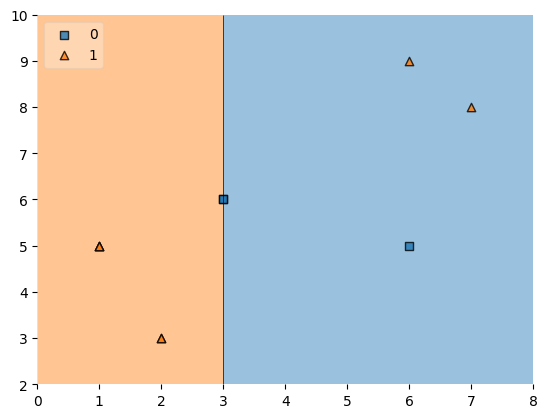

In [155]:
plot_decision_regions(np.array(x),np.array(y),clf=dt3,legend=2)

# additive modeling

In [159]:
# final_pred = (alpha1*dt1)+(alpha2*dt2)

In [160]:
print(alpha1,alpha2)

0.42364893019360184 1.0986122886681098


In [161]:
query = np.array([[5,1]])

In [162]:
dt1.predict(query)

c:\Users\gadha\anaconda3\envs\ids\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [163]:
dt2.predict(query)

array([0], dtype=int64)

In [166]:
final_pred = alpha1*(-1) + alpha2*(-1)

In [167]:
np.sign(final_pred)

-1.0

In [176]:
query = np.array([[6,9]])

In [177]:
dt1.predict(query)

c:\Users\gadha\anaconda3\envs\ids\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [178]:
dt2.predict(query)

array([0], dtype=int64)

In [179]:
final_pred = alpha1*(1) + alpha2*(-1)

In [180]:
np.sign(final_pred)

-1.0